# Chapter 7 Internal Forces

## Section 7.1 Internal Loadings Developed in Structural Members
* Internal loadings can be determined using method of sections, need to know internal forces to know if the material can resist the loading
* Force $\vec N_B$ acts perpendicular to the cross-section, called normal force
* Force $\vec V_B$ acts tangent to the cross-section, called shear force
* Couple moment $\vec M_B$ is called bending moment
* These force components prevent translation between the two segments, and couple moment prevents rotation
* As a result of Newton's third law these loadings must act in opposite directions on each segment, can be determined by using equations of equilibrium
* Direct solution for $\vec N_B$, solve $\sum F_x = 0$ where x is the axis in which only $\vec N_B$ is on, to find $\vec M_B$ apply $\sum M_B = 0$ since moments of $\vec N_B$ and $\vec V_B$ about point $B$ i $0$, $B$ is the point of the cut
* In 2D - 3 internal loading resultants
* In 3D - 1 general resultant internal force and 1 couple moment resultant
* If $\vec N_y$ is the normal force then $\vec V_x$ and $\vec V_z$ are shear force components, $\vec M_y$ is torsional or twisting moment, $\vec M_x$ and $\vec M_y$ are bending moment components
* In most applications these resultant loadings act at the geometric center of the section's cross-sectional area
* The magnitude for each loading can be different at various points along the axis of the member, we can use the method of sections to determine their values
* The normal force is positive if it creates tension
* Shear force is positive if it causes the beam segment to rotate clockwise
* Bending moment is positive if it tends to bend the segment in a concave upward manner
* 4 types of resultant internal loads in a member - normal and shear force, bending and torsional moments
* Procedure for Analysis
    * Determine support reactions
    * FBD - keep all distributed loadings, couple moments, and forces acting on the member in the exact locations, then pass an imaginary section perpendicular to its axis at the point where the internal loadings will be determined
    * FBD - draw FDB of the segment that has the least number of loads on it, indicate the components of the internal force and couple moment resultants at tge cross-section acting in their positive directions in accordance with the established sign convention
    * Equations of Equilibrium - sum moments at the section, so normal and shear forces at the section are 0, therefore direct solution for moment
    * Equations of Equilibrium - if the solution to the equations yields a negative scalar, the sense of the quantity is opposite to what is in the FBD

## Section 7.2 Shear and Moment Equations and Diagrams
* Beam - Structural members designed to support loadings applied perpendicular to their axes, usually long and straight and have constant cross-sectional area
* Simply supported beam - pinned at one end and roller supported at the other
* Cantilevered beam - fixed at one end and free at the other
* To design a beam you need detailed knowledge of the variation of the internal shear force $V$ and bending moment $M$ acting at each point along the axis of the beam
* Variations of $V$ and $M$ along beam's axis can be determined by method of sections, can get $V$ and $M$ as functions of $x$, where x is distance
* Internal shear and bending moment functions will be discontinuous, slopes will be discontinuous at points where a distributed load changes or concentrated forces or couple moments are applied, as a result these functions need to be determined for each segment of the beam inbetween two discontinuities of loading
* Plotting these functions vs x, the graphs are called shear diagram and bending-moment diagram
* These graphs show how internal shear and moment vary throughout the beam's length
* If load on the beam suddenly changes then regions between each load must be selected to obtain each function of x
* Procedure for Analysis - constructing diagrams
    * Support Reactions - determine all reactive forces and couple moments acting on the beam and resolve all the forces into components acting perpendicular and parallel to the beam's axis
    * Shear and Moment Functions - specify coordinates $x$ with origin at beam's left end and extending to regions of the beam between concentrated forces and couple moments, where distributed loading is continuous
    * Shear and Moment Functions - section the beam at each distance $x$ and draw FBD of one of the segments, show $\vec V$ and $\vec M$ in positive sense
    * Shear and Moment Functions - shear $V$ is obtained by summing forces perpendicular to the beam's axis, moment $M$ is obtained by summing moments about the sectioned end of the segment
    * Shear and Moment Diagrams - plot shear diagram (V vs x) and moment diagram (M vs x), if values of $V$ and $M$  are positive the values are plotted above the $x$ axis

Problem 59
Draw the shear and moment diagrams for the beam.
<img src="pictures\problem_7_59.png" width="512"/>


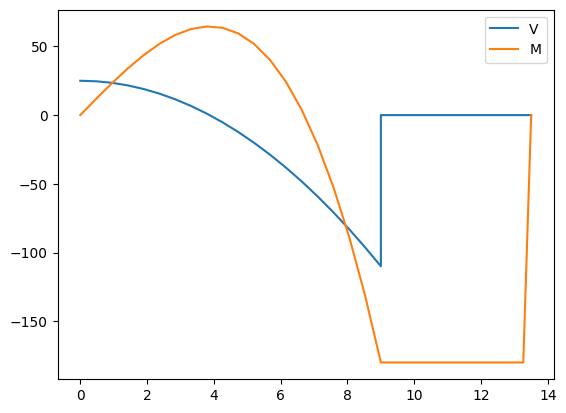

In [63]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
M = 180
w = 30
d_1 = 9
d_2 = 4.5

equation = lambda x: 30/9 * x
x_w = lambda x: x * 30/9 * x
force_R = integrate.quad(equation, 0, 9)[0]
x_position = integrate.quad(x_w, 0, 9)[0] / force_R


# sum moment about A
B_y = (M + force_R * x_position) / d_1
# sum F_y at A
A_y = -B_y + 1/2 * w * d_1
# sum F_y on AB
# V = A_y - 1/2 * w / d_1 * x**2
# V = 0
x = np.sqrt(25/(w * 0.5 / d_1))
# sum moment about AB
#M_1 = A_y * x - 1/2 * (w * x / d_1) * x * x/3
#M_1= A_y * x - 1/2 * (w/d_1)/3 * x**3
# sum F_y on BC
# V = A_y - 1/2 * w * d_1 + B_y = 0, V = 0
V_BC = 0
#sum moment about BC
M_BC = 25 * x + -1/2 * w * d_1 * (x-6) + B_y * (x-9)
x_1 = np.linspace(0,d_1,20)
y_V1 = A_y - 1/2 * w / d_1 * x_1**2
y_M1 = A_y * x_1 - 1/2 * (w/d_1)/3 * x_1**3
x_2 = np.linspace(d_1,d_1+d_2,20)
y_V2 = 0 * x_2
y_M2 = np.repeat(-180,19)
y_M3 = 0
x_3 = np.hstack((x_1,x_2))
v_3 = np.hstack((y_V1,y_V2))
m_3 = np.hstack((y_M1,y_M2,y_M3))
plt.plot(x_3 ,v_3)
plt.plot(x_3,m_3)
plt.legend(['V','M'])
plt.show()

## Section 7.3 Relations between Distributed Load, Shear, and Moment
* Simpler method for creating these diagrams - based on differential relations that exist between the load, shear, and bending moment
* Consider a beam with load $w = w(x)$ and a series of concentrated forces and couple moments, distributed load will be positive when loading acts upward
* Create a FBD for a segment of the beam with length $\Delta x$ is chosen at a point $x$ along the beam which is not subjected to a concentrated force or couple moment, these results will not apply at these points of concentrated loading, internal shear force and bending moment in FBD will be assumed to act in positive sense, shear force and moment acting on the right hand side must be increased by a small finite amount to keep segment in equilibrium, the distributed loading can be replaced by resultant force $\Delta F = w(x) \Delta x$ that acts at a fractional distance $k(\Delta x)$ from the right end, $ 0 < k < 1$, if $w(x)$ is uniform $k = \frac{1}{2}$
* Relation between the Distributed Load and Shear
    * Use force equation of equilibrium - $\sum F_y = 0 \Rightarrow V + w(x) \Delta x - (V + \Delta V) = 0 \Rightarrow \Delta V = w(x) \Delta x$, dividing by $\Delta x$ and letting $\Delta x \rightarrow 0$, $\frac{dV}{dx} = w(x)$, slope of shear diagram = distributed load intensity
    * We can rewrite the equation and perform integration between two points on the beam, $\Delta V = \int{w(x)dx}$, change in shear = area under loading curve
* Relation between the Shear and Moment
    * Use moment equation of equilibrium about point $O$ on the FBD, $O$ is on the right edge of the segment in the middle, $\sum M_O = 0 \Rightarrow (M + \Delta M) - (w(x) \Delta x) k \Delta x - V \Delta x - M = 0 \Rightarrow \Delta M = V \Delta x + kw(x) \Delta x ^2$, dividing by $\Delta x$ and let $\Delta x \rightarrow 0$, $\frac{dM}{dx} = V$, slope of moment diagram = shear, maximum bending moment will happen where $\frac{dM}{dx} = 0$ since this is where shear is $0$, can integrate this equation between two points on the beam, $\Delta M = \int{Vdx}$, change in moment = area under shear diagram
      * The above equations do not apply at points where a concentrated force or couple moment acts, these create discontinuities in the shear and moment diagrams, each need separate treatment
* Force - FBD of small segment of beam under one of the forces, force equilibrium requires $\sum F_y = 0 \Rightarrow \Delta V = F$, change in shear is positive the shear diagram will go upward when $\vec F$ acts upward on the beam, the jump in shear $\Delta V$ is downward when $\vec F$ acts downward
* Couple Moment - remove a segment of the beam that is located at the couple moment $\vec M_O$, let $\Delta x \rightarrow 0$, then $\sum M = 0 \Rightarrow \Delta M = M_0$, change in moment is positive, moment diagram will go upward if $\vec M_0$ is clockwise, jump $\Delta M$ is downward when $\vec M_O$ is counterclockwise
* points of zero shear imply the points of maximum or minimum moment since $\frac{dM}{dx}= 0$

Problem 85
Draw the shear and moment diagrams for the beam.
<img src="pictures\problem_7_85.png" width="2000"/>


3600.0
<class 'numpy.ndarray'>


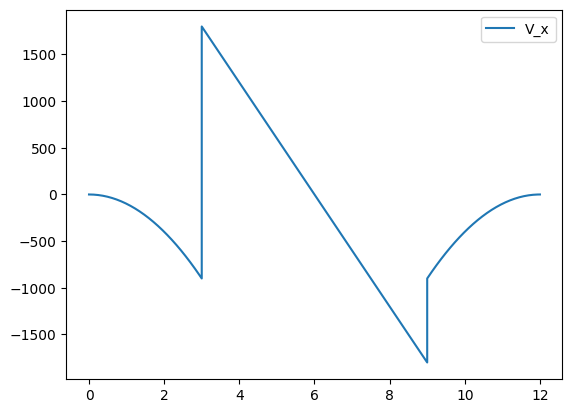

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
w = 600
d_1 = 3
d_2 = 6
d_3 = 3
positions = {
    'A': np.array([d_1 + d_2]),
    'B': np.array([d_1]),
    'C': np.array([0]),
    'D': np.array([d_1 + d_2 + d_3]),
}
#F_R_CB
equation_CB = lambda x: 600/3 * x
x_w_CB = lambda x: x * 600/3 * x
force_R_CB = integrate.quad(equation_CB, 0, 3)[0]
positions['F_R_CB'] = integrate.quad(x_w_CB, 0, 3)[0] / force_R_CB
#F_R_BA
equation_BA = lambda x: 600
x_w_BA = lambda x: x * 600
force_R_BA = integrate.quad(equation_BA, 3, 9)[0]
positions['F_R_BA'] = integrate.quad(x_w_BA, 3, 9)[0] / force_R_BA
#F_R_AD
equation_AD = lambda x: 600/3 * (x-9)
x_w_AD = lambda x: 600/3 * (x-9)**2
force_R_AD = integrate.quad(equation_AD, 9, 12)[0]
positions['F_R_AD'] = d_1 + d_2 + d_3 - integrate.quad(x_w_AD, 9, 12)[0] / force_R_AD
x_1 = np.linspace(0,d_1)
x_2 = np.linspace(d_1, d_1 + d_2)
x_3 = np.linspace(d_1 + d_2,d_1 + d_2 + d_3)

#moment about A
N_B = (force_R_BA * (positions['A'] - positions['F_R_BA']) + force_R_CB * (positions['A'] - positions['F_R_CB']) - force_R_AD * (positions['F_R_AD'] - positions['A'])) / (positions['A'] - positions['B'])
#moment about B
A_y = (-force_R_CB * (positions['B'] - positions['F_R_CB']) + force_R_BA * (positions['F_R_BA'] - positions['B']) + force_R_AD * (positions['F_R_AD'] - positions['B'])) / (positions['A'] - positions['B'])
# sum of F_y on CB
# V_x_CB = -1/2 * w * x_1/d_1 * x_1 = -100*x_1**2
V_x_CB = -100 * x_1**2
# moment about CB
# M_x_CB = -1/2 * w* x_1/d_1 * 1/3 * x_2 = -100*x_1**3/3
M_x_CB = -100 * x_1**3 / 3
# sum F_y on BA
# V_x_BA = -force_R_CB + N_B - (x_2-3) * w = 1800 - 600(x_2-3)
V_x_BA = -force_R_CB + N_B - w * (x_2-3)
# moment about BA
# M_x_BA = -force_R_CB * (x-2)) + N_B * (x-3) - w * (x-3) * (x-3)/2 = -900(x-2) + N_B(x-3) - w/2 * (x-3)**2
M_x_BA = -force_R_CB * (x_2-2) + N_B * (x_2 - 3) - w/2 * (x_2 - 3)**2
# sum of F_y on AD
# V_x_AD = 1/2 * 600x/3 * x = 100x**2
# V_x_AD = -100 * (x_3-9)**2 + 900

test = lambda x: -(2400-600 * x)
new = lambda x: 600 * (12-x)/(12-9)
# test2 = integrate.quad(test, 9, x_3)[0]
random = []
for x in x_3:
    random.append(integrate.quad(new, 9, x)[0])
random = np.array(random)
print(force_R_BA)
print(type(random))
V_x_AD = random + force_R_BA + force_R_CB - N_B - A_y
# moment about AD
# M_x_AD = -1/2 * 600x/3 * x * 1/3 * x = -100x**3/3
M_x_DA = 100 * (12 - x_3)**3 / 3 - 900

x_4 = np.hstack((x_1,x_2,x_3))
V_x = np.hstack((V_x_CB,V_x_BA,V_x_AD))
M_x = np.hstack((M_x_CB,M_x_BA,M_x_DA))
#plt.plot(x_4,V_x)
#plt.plot(x_4,M_x)
plt.legend(['V_x','M_x'])
plt.show()

## Section 7.4 Cables
* Flexible cables combine strength with lightness and are used in structures for support and to transmit loads from one member to another
* When cables are used to support suspension bridges and trolley wheels, the cables form the main load-carrying element of the structure
* When doing force analysis of the system the weight of the cable can be neglected since it is small compared to the load
* When cables are used as transmission lines the cable weigh may be needed for analysis
* 3 cases will be considered in the analysis, in each case we will assume the cable is perfectly flexible and inextensible, due to flexibility the cable offers no resistance to bending, therefore the tensile force acting in the cable is tangent to the cable at points along its length, since it is inextensible the cable has a constant length before and after the load is applied, as a result once the load is applied the geometry of the cable is unchanged and the cable can be treated as a rigid body
### Cable Subjected to Concentrated Loads
 * When a cable with negligible weight supports several concentrated loads, the cable takes form of several straight-line segments, each is subjected to a constant tensile force
 * Consider a cable with end points $A$ and $B$ with a point $C$ where a load, $\vec P$ is applied, the sag $y_C$ is the distance between the y value of $A$ and the y value of $C$, $A$ has 2 components of reaction and $B$ has 2 components of reaction as well, each segment contains a tension force, total of 7 unknowns, to solve we can write 2 equations of equilibrium at each point, the last equation requires us to know something about the geometry of the cable, if we know the total length of cable we can use pythagorean theorem to relate each of the 2 segmental lengths, in terms of $h$ which is the y difference of $A$ and $B$, $y_C$ and $L_1$ and $L_2$ which are the lengths of the 2 segments, to the total length $L$. If $y_B$ is known the equilibrium equations are sufficient for obtaining the unknown forces, the length of the cable can be determined by trigonometry
### Cable Subjected to a Distributed Load
* Consider a weightless cable which is subjected to a distributed loading $w = w(x)$ that is measured in $x$ direction, the FBD of a small segment of the cable with length $\Delta s$, the tensile force changes in magnitude and direction along the cable's length, we denote this change as $\Delta T$ on the FBD, the distributed load is represented by its resultant force $w(x) \Delta x$ which acts at a fractional distance $k(\Delta x)$ from $O$, where $O$ is the right end point of the segment, $ 0<k<1$, apply equations fo equilibrium
    * $\sum F_x = 0, -T \cos{\theta} + (T + \Delta T) \cos{(\theta + \Delta \theta)} = 0$
    * $\sum F_y = 0, - T \sin{\theta} - w(x)(\Delta x) +  (T + \Delta T) \sin{(\theta + \Delta \theta)} = 0$
    * $\sum M_O = 0, w(x)(\Delta x)k(\Delta x) - T \cos \theta \Delta y + T \sin \theta \Delta x = 0$
* Divide each equation by $\Delta x$ and take the limit as $\Delta x \rightarrow 0$, and therefore $\Delta y \rightarrow 0$, $\Delta \theta \rightarrow 0$, and $\Delta T \rightarrow 0$ and we obtain
    * $\frac{d(T \cos \theta)}{dx} = 0$   &emsp;  (7-7)
    * $\frac{d(T \sin \theta)}{dx} - w(x) = 0$   &emsp;   (7-8)
    * $\frac{dy}{dx} = \tan \theta$   &emsp;  (7-9)
* Integrating the first 2 equations we obtain
    * $T \cos \theta = constant = F_H$, $F_H$  &emsp; (7-10) is the horizontal component of tensile force at any point along the cable
    * $T \sin \theta = \int{w(x)dx}$  &emsp;  (7-11)
* Dividing (7-11) by (7-10) eliminates $T$ then using (7-9) we can obtain the slope of the cable
    * $\tan \theta = \frac{dy}{dx} = \frac{1}{F_H} \int{w(x)dx}$
* Integrating again  yields
    * $y = \frac{1}{F_H} \int({\int{w(x)dx})dx}$ &emsp; (7-12)
* This equation is used to determine the curve for the cable $y=f(x)$ the horizontal force component $F_H$ and the additional two constants $C_1$ and $C_2$ resulting from the integration are determined by applying the boundary conditions for the curve
### Cable Subjected to Its Own Weight
* Consider a cable and the weight of the cable is important in the force analysis, the loading function along the cable will be a function of the arc length $s$ rather than the projected length $x$, consider a generalized loading function $w = w(s)$ acting along the cable, draw FBD for a small segment $\Delta s$, applying the equations of equilibrium to the force system on the FBD, we can obtain relationships identical t (7-7) through (7-9), but with $s$ in place of $x$ in (7-7) and (7-8), we can show
    * $T \cos \theta = F_H$
    * $T \sin \theta = \int{w(s)ds}$ &emsp;  (7-13)
    * $\frac{dy}{dx} = \frac{1}{F_H} \int{w(s)ds}$ &emsp;  (7-14)
* To perform integration of (7-14) we need to replace $\frac{dy}{dx}$ by $\frac{ds}{dx}$ since $ds = \sqrt{dx^2+dy^2}$, then $\frac{dy}{dx} = \sqrt{\frac{ds}{dx}^2 - 1}$
* Therefore
    * $\frac{ds}{dx} = [1 + \frac{1}{F^2_H}(\int{w(s)ds})^2]^{1/2}$
* Separating the variables and integrating we obtain
    * $x = \int{\frac{ds}{[1 + \frac{1}{F^2_H}(\int{w(s)ds})^2]^{1/2}}$
* The two constants $C_1$ and $C_2$ can be found using the boundary conditions of the curve


Problem 116
The man picks up the 52-ft chain and holds it just
high enough so it is completely off the ground. The chain
has points of attachment A and B that are 50 ft apart. If the
chain has a weight of 3 lb/ft, and the man weighs 150 lb,
determine the force he exerts on the ground. Also, how
high h must he lift the chain? Hint: The slopes at A and B
are zero.
<img src="pictures\problem_7_116.png" width="512"/>


In [65]:
from sympy import *
s,F_H = symbols('s F_H' ,positive = True)
expr = 3
weight_integral = integrate(expr,s)
print(weight_integral)
expr_1 =  1/((1 + (1/(F_H**2)) * weight_integral**2)**1/2)
full_integral = integrate(expr_1,s)
print(full_integral)

3*s
2*F_H*atan(3*s/F_H)/3


In [66]:
from sympy import *
s,F_H,w_0 = symbols('s F_H w_0' ,positive = True)
expr = w_0
weight_integral = integrate(expr,s)
print(weight_integral)
expr_1 =  1/sqrt(1 + (1/(F_H**2)) * weight_integral**2)
full_integral = integrate(expr_1,s)
print(full_integral)

s*w_0
F_H*asinh(s*w_0/F_H)/w_0


In [67]:
import numpy as np
w = 3
import scipy.integrate as integrate
from scipy.optimize import fsolve
from sympy import *
s,F_H = symbols('s F_H' ,positive = True)
w_0 = 3
weight_integral = integrate(w_0,s)
expr_1 =  1/sqrt(1 + (1/(F_H**2)) * weight_integral**2)
full_integral = integrate(expr_1,s)

# x = (F_H / w) * (sinh**-1 ((1/F_H) * ws + C_1) + C_2)     1
# dy/dx = (1/F_H) * (w*s)                                   2
# dy/dx = 0 at s = 0 so C_1 = 0 from 2
# s = 0 when x = 0 so C_2 = 0 from 1
# s = F_H/w * sinh(w*x/F_H) rearrange 1                     3
# dy/dx = sinh(w*x/F_H) substitute 3 into 2
# y = F_H/w * cosh(w*x/F_H) + C_3                           4
# y = 0 when x = 0 from 5, C_3 = -F_H/w then
# y = F_H/w * (cosh(w*x/F_H) - 1)                           5
# s = 26 when x = 25 from 3, 26 = F_H/w * sinh(w*25/F_H)
x = 25
s = 26
def cable_function(force,arguments):
    return force/arguments[0] * np.sinh(arguments[0]*arguments[1]/force) - arguments[2]
# func = x/w * np.sinh(w*25/x) -26
F_H = fsolve(cable_function, 130, args=[w,x,s])[0]


h = F_H/w * (np.cosh(w*25/F_H) - 1) #from 5
print(f'height = {h:.2f} ft')
# dy/dx with s=26 = tan(theta) = w*s/F_H
theta = np.arctan(w*26/F_H)
F_V = F_H * np.tan(theta)
#sum of F_y, N_m -150 - 2 * F_V
N_m = 150 + 2 * F_V
print(f'N_m = {N_m}lb')

height = 6.21 ft
N_m = 306.0lb


8 problems 19,74,96,128

9 problems 44, 82, 105, 127

9 problems 44, 82, 105, 127